In [1]:
from google.colab import drive
drive.mount('/content/drive')
#Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.signal import convolve2d
from skimage import filters
from skimage import io
from sklearn.metrics import *


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def clasificacion(test):
          
          import numpy as np
          import matplotlib.pyplot as plt
          from sklearn.preprocessing import StandardScaler
          from sklearn.naive_bayes import GaussianNB
          from sklearn.metrics import confusion_matrix
          from sklearn.svm import SVC
          from sklearn.tree import DecisionTreeClassifier 
          from sklearn.ensemble import RandomForestClassifier
          from sklearn.model_selection import KFold, cross_val_score
          from sklearn.decomposition import PCA
          import cv2
          from scipy.signal import convolve2d
          from sklearn.pipeline import Pipeline
          from skimage import filters
         
          import pandas as pd
          X_test = pd.read_csv("drive/My Drive/Colab Notebooks/emnist-letters-test-images.csv", header=None).values.astype(float)
          y_test= pd.read_csv("drive/My Drive/Colab Notebooks/emnist-letters-test-labels.csv", header=None).values
          X_train= pd.read_csv("drive/My Drive/Colab Notebooks/emnist-letters-train-images2.csv", header=None).values.astype(float)
          y_train= pd.read_csv("drive/My Drive/Colab Notebooks/emnist-letters-train-labels2.csv", header=None).values
         

          #Para rotar la imagen 
          for j in range(62400):
            Y=X_train[j].reshape(28,28).T
            X_train[j]=Y.reshape(784)

          for j in range(20800):
              Y=X_test[j].reshape(28,28).T
              X_test[j]=Y.reshape(784)


          #Clasificadores

          est1=RandomForestClassifier(n_estimators=80,  max_depth = 20)

          #Binarización
          for j in range(62400):
              img=X_train[j].reshape(28,28)
              _, img1 = cv2.threshold(img,110, 255, cv2.THRESH_BINARY)
              X_train[j]=img1.reshape(784)

          for j in range(20800):
              img=X_test[j].reshape(28,28)
              _, img1 = cv2.threshold(img,110, 255, cv2.THRESH_BINARY)
              X_test[j]=img1.reshape(784)


          #PCA con n componentes
          pca=PCA(n_components=40)
          X_train = pca.fit_transform(X_train)
          test = pca.transform (test)          
          

          #RandomForest
          est1.fit(X_train,y_train)
          pred= est1.predict(test)
          return pred



In [0]:
    global Data  
    Data=[]
   

In [0]:
Y_data=[]

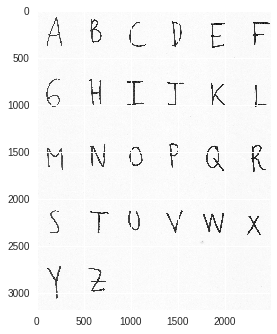

In [58]:

#for k in range(34):
    img= cv2.imread("drive/My Drive/Colab Notebooks/IMAGENES/letras16.jpg")
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(gray,cmap = plt.cm.gray)
    

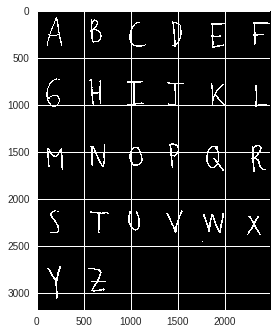

In [59]:
 
    #SEGMENTACIÓN CARACTERES
    
    #Binarización
    _, imgP2 = cv2.threshold(gray,200, 255, cv2.THRESH_BINARY_INV)
    #_, imgP2 = cv2.threshold(gray,130, 255, cv2.THRESH_BINARY_INV)
    plt.imshow(imgP2,cmap = plt.cm.gray)




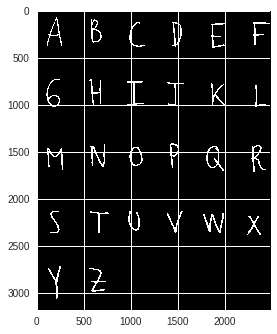

In [60]:
    #Apertura
    kernel1  =  np . ones ((6,6), np . uint8 )
    apertura = cv2.morphologyEx(imgP2, cv2.MORPH_OPEN, kernel1)
    plt.imshow(apertura,cmap = plt.cm.gray)


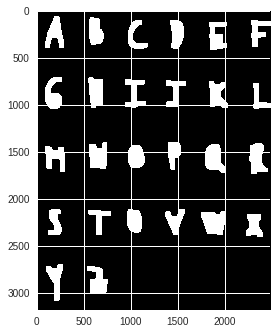

In [61]:
 #Dilatación para unir partes del objeto que quedan incompletas
    kernel1  =  np . ones ((40,40), np . uint8 )
    dilatacion = cv2.dilate(apertura,kernel1,iterations = 1)

    # CIERRE--COVOLUCIÓN
    #Es útil para cerrar pequeños orificios dentro de los objetos en primer plano o pequeños puntos negros en el objeto.
    kernel1  =  np . ones ((50,50), np . uint8 )
    cierre  =  cv2.morphologyEx(dilatacion, cv2.MORPH_CLOSE, kernel1)
    plt.imshow(cierre,cmap = plt.cm.gray)
    im2, contornos, jerarquía = cv2.findContours (dilatacion,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

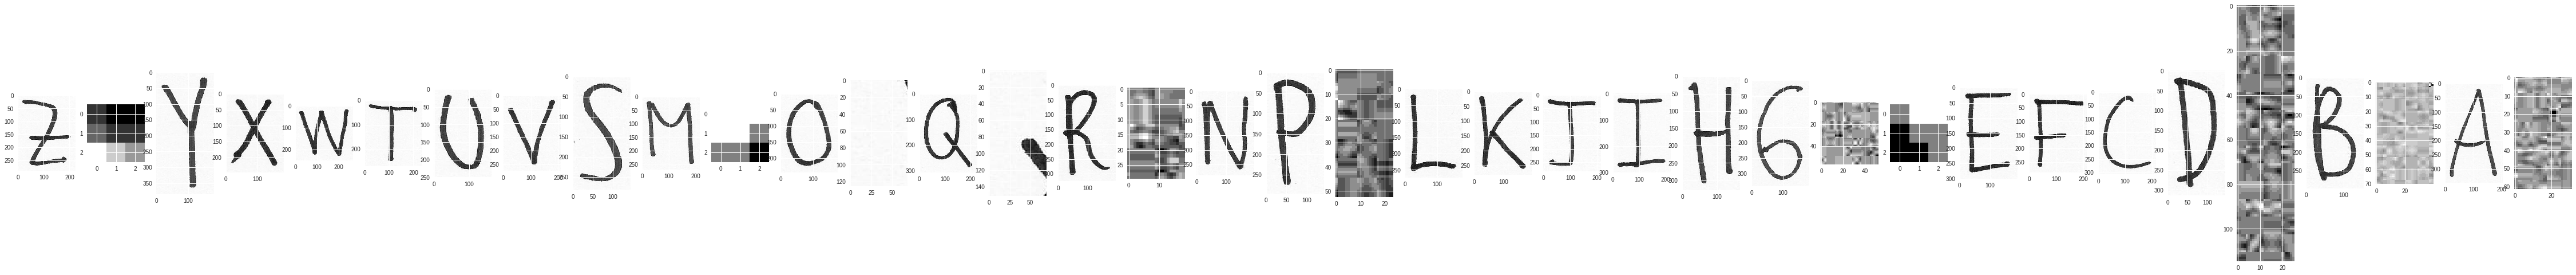

In [62]:
    #Contornos
    contornos=np.r_[contornos]
    len(contornos)
    
    limites= np.zeros((len(contornos),4))
    areas=np.zeros((len(contornos),1))
    for i in range(len(contornos)):
      #Señalar los limites del rextangulo, xInit, yInit, xEnd, fEnd
      limites[i,:]= cv2.boundingRect(contornos[i])
      puntox1= limites[i,0]
      puntox2=limites[i,2]
      puntoy1= limites[i,1]
      puntoy2= limites[i,3]
      base= (puntox2-puntox1)
      altura= (puntoy2-puntoy1)
      areas[i]=abs(base*altura)
    limites.shape[0]
    
    #Graficar
    fig= plt.figure(figsize=(80,80))
    images=[]
    for i in range(len(limites)):
        ax=fig.add_subplot(1,len(limites),i+1)
        zona=limites[i]
        f_image2=gray[int(zona[1]):int(zona[1]+zona[3]),int(zona[0]):int(zona[0]+zona[2])]
        #f_image=imageP[106:259,137:615]
        plt.imshow(f_image2,cmap = plt.cm.gray)
        images.append(f_image2)
        
    #Eliminar ruido    
    c=0
    arreglo=list()
    while c< limites.shape[0]:
      for i in range(limites.shape[0]):
        if c != i:
          if (limites[c,2]+limites[c,0])<= (limites[i,2]+limites[i,0]) and limites[c,0]>= limites[i,0] and (limites[c,3]+limites[c,1])<= (limites[i,3]+limites[i,1]) and limites[c,1]>= limites[i,1]:

              arreglo.append(c)

          else:
            continue
        else:
             continue

      c=c+1

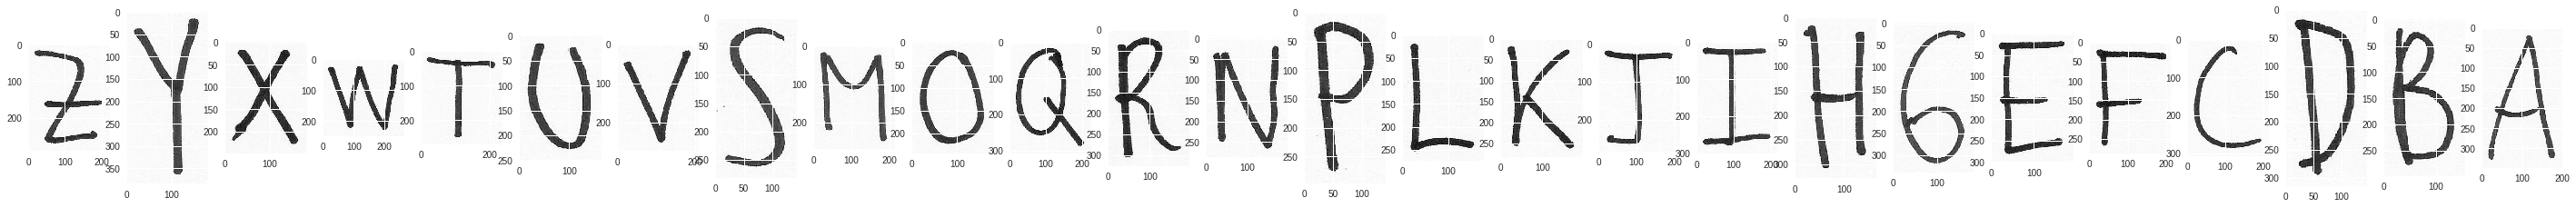

In [63]:
  #Imagenes a eliminar
    arreglo
    a=len(arreglo)
    resta=limites.shape[0] - a
    
    #Modifica el vector limites
    limites_c=np.array(limites,dtype=bool)
    limites_c[arreglo]=False
    limites=limites[limites_c]
    limites=limites.reshape((resta,4))
    
    

    #Graficar
    fig= plt.figure(figsize=(50,50))
    images=[]
    for i in range(len(limites)):
        ax=fig.add_subplot(1,len(limites),i+1)
        zona=limites[i]
        f_image2=gray[int(zona[1]):int(zona[1]+zona[3]),int(zona[0]):int(zona[0]+zona[2])]
        plt.imshow(f_image2,cmap = plt.cm.gray)
        images.append(f_image2)

In [0]:
#SI NECESITAN ELIMINAR UN INDICE , LO PUEDEN HACER DE LA SIGIENTE MANERA:
#images.pop(8)

array([[253, 250, 250, ..., 251, 252, 252],
       [255, 253, 253, ..., 251, 252, 253],
       [254, 253, 253, ..., 250, 251, 253],
       ...,
       [246, 248, 248, ..., 249, 249, 250],
       [247, 250, 249, ..., 247, 248, 249],
       [248, 254, 253, ..., 246, 247, 249]], dtype=uint8)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


[ 2  2 22 24 23 21 10 10 15 13  8  7 23 16 12  9 21 11  9  7  6 18  3 21
 23  1 25 25 24 21 23 22 19 20 17 14 13 17 22 18  8  7 10 10 12 11 21  3
  5  2  1  6  6 25 22 23 23  6 12 24 14  4 13 16 25 11 10  7 13  9 11 23
  6  6  3  1  2 21 26 25 24 23 20 21 22 19 13 15 17 11 14 16  3 11 10  9
  8  7 11  6  3 21  2  1]


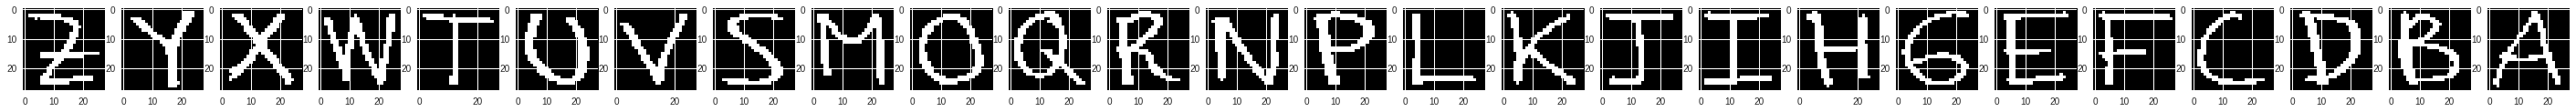

In [64]:
  #resize, binarizaciòn , dataset
    fimages=[]
  
    for i in range(len(images)):

      x= images[i]
      m = cv2.resize(x, (28,28), interpolation=cv2.INTER_AREA)  
      #Binarización
      #_, m = cv2.threshold(m,130, 255, cv2.THRESH_BINARY_INV)
      _, m = cv2.threshold(m,200, 255, cv2.THRESH_BINARY_INV)
      m=m.reshape(784)
      fimages.append(m)
      Data.append(m)
    
    #Objeto clasificador- test
    pred=clasificacion(Data)
    
    #Predicciones
    print (pred)
    
    #Grafica OWN-Datasets
    fig= plt.figure(figsize=(50,50))
    for i in range(len(images)):
        ax=fig.add_subplot(1,len(images),i+1)
        m= fimages[i]
        m=m.reshape(28,28)
        plt.imshow(m,cmap = plt.cm.gray)


In [0]:
#SI LA SEGMENTACION SALE BIEN
Data2=np.copy(Data)

In [0]:
#SI LA SEGMENTACION SALE MAL
Data=np.copy(Data2)

In [66]:
#TAMAÑO DE DATA HASTA EL MOMENTO
len(Data)

104

In [67]:
for i in range(len(fimages)):
    Y_data.append(int(input("escriba y ")))

escriba y 26
escriba y 25
escriba y 24
escriba y 23
escriba y 20
escriba y 21
escriba y 22
escriba y 19
escriba y 13
escriba y 15
escriba y 17
escriba y 18
escriba y 14
escriba y 16
escriba y 12
escriba y 11
escriba y 10
escriba y 9
escriba y 8
escriba y 7
escriba y 5
escriba y 6
escriba y 3
escriba y 4
escriba y 2
escriba y 1


In [68]:
len(Y_data)

104

In [0]:
#PARA ALMACENAR
df=pd.DataFrame(Data)
df.to_csv("Data.csv", header=None , index= None)

In [0]:
df=pd.DataFrame(Y_data)
df.to_csv("Y_Data.csv", header=None , index= None)

In [0]:
print ("Accuray:",accuracy_score(pred,Y_data))

escriba4
escriba3
escriba5


In [0]:
car

['4', '3', '5']

In [0]:
for i in range(len(prueba)):
    
            if prueba[i]==1:  
               caracteres.append("a")
                     
            elif prueba[i]==2:  
              caracteres.append("b")
                     
            elif prueba[i]==3:
              caracteres.append("c")
                     
            elif prueba[i]==4: 
              caracteres.append("d")
              
            elif prueba[i]==5: 
              caracteres.append("e")
                     
            elif prueba[i]==6:  
              caracteres.append("f")
                     
            elif prueba[i]==7: 
              caracteres.append("g")
                     
            elif prueba[i]==8: 
              caracteres.append("h")
                     
            elif prueba[i]==9:  
              caracteres.append("i")
                     
            elif prueba[i]==10:
              caracteres.append("j")
                     
            elif prueba[i]==11:
              caracteres.append("k")
                     
            elif prueba[i]==12:
              caracteres.append("l")
                     
            elif prueba[i]==13:
              caracteres.append("m")
                     
            elif prueba[i]==14:
              caracteres.append("n")
                     
            elif prueba[i]==15: 
              caracteres.append("o")
                     
            elif prueba[i]==16:
              caracteres.append("p")
                     
            elif prueba[i]==17: 
              caracteres.append("q")
                     
            elif prueba[i]==18: 
              caracteres.append("r")
                     
            elif prueba[i]==19: 
              caracteres.append("s")
                     
            elif prueba[i]==20: 
              caracteres.append("t")
                     
            elif prueba[i]==21: 
              caracteres.append("u")
                    
            elif prueba[i]==22: 
              caracteres.append("v")
                     
            elif prueba[i]==23: 
              caracteres.append("w")
                     
            elif prueba[i]==24:
              caracteres.append("x")
                     
            elif prueba[i]==25: 
              caracteres.append("y")
                     
            elif prueba[i]==26: 
              caracteres.append("z")
                       
        

In [0]:
caracteres

In [0]:
frase=""
frase= "".join([i for i in caracteres])

In [0]:
frase